# Introduction au Deep Learning appliqué aux images

## Tasks
![https://xkcd.com/1425/](https://imgs.xkcd.com/comics/tasks.png)

*Title text:* In the 60s, [Marvin Minsky](https://fr.wikipedia.org/wiki/Marvin_Minsky) assigned a couple of undergrads to spend the summer programming a computer to use a camera to identify objects in a scene. He figured they'd have the problem solved by the end of the summer. Half a century later, we're still working on it. 

https://xkcd.com/1425/

## TP4 : Les basiques
  - Vue d'ensemble des problématiques traitées par le Deep Learning sur les images
  - Les basiques (une redite?) : Le perceptron
  - Application : Coder un perceptron en python
  - Présentation de Pytorch
  - Application : Prise en main de pytorch réseau simple
  - Application : ~~classification d'image~~
    
## TP5 : Autoencodeurs

## TP6 : GAN    

# Les prouesses du deep learning sur les images

https://github.com/kjw0612/awesome-deep-vision


## super resolution
http://lxu.me/projects/dcnn/results.html

## segmentation
http://mi.eng.cam.ac.uk/projects/segnet/

## Human pose estimation
https://beyondminds.ai/an-overview-of-human-pose-estimation-with-deep-learning/

## Art ? 
https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html

## Art
https://github.com/jcjohnson/neural-style

## Fake 
https://thispersondoesnotexist.com/

https://thiscatdoesnotexist.com/

## Image to text
https://cs.stanford.edu/people/karpathy/deepimagesent/

## Image from text : Dall-e
https://openai.com/blog/dall-e/

# Au commencement il y a les neurones

![](https://resize1.prod.docfr.doc-media.fr/rcrop/650,380,center-middle/img/var/doctissimo/storage/images/fr/www/sante/maladies-du-cerveau/transmissions-neuronales/transmission-neuronale/374802-2-fre-FR/transmission-neuronale.jpg)

# En informatique ça ressemble plutôt à ça

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/ArtificialNeuronModel_francais.png/1280px-ArtificialNeuronModel_francais.png)

# Perceptron 

On a des entrées $X$ vecteur de réels de taille n.

On a des poids $W$ vecteur de réels de taille n.

On obtient à la sortie la valeur $z$ définie par $z= \sum_i x_i w_i$

Puis l'output est généré en passant pas la fonction d'activation $\phi$.
On a donc $o = \phi(z)$

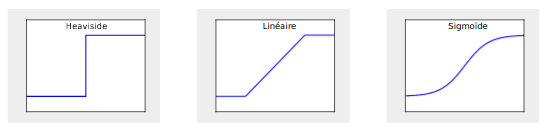

La sigmoide se définit comme:

$$\phi(x) = \frac{1}{1+\exp(-x)}$$

**C'est une fonction dérivable!**

Pourquoi est-ce important? 

On va pouvoir facilement faire des calculs d'erreur et une descente de gradient.

On définit l'erreur d'un exemple $k$ comme $E_k = (y_k - o_k)$

$y_k$ étant la vraie target de l'exemple.

Lors de l'apprentissage, on veut réduire l'erreur globale sur les exemples.

On calcule une erreur classique :
$$E = \frac{1}{2} \sum_k E_k^2 = \frac{1}{2} \sum_k (y_k - o_k)^2$$

Comment on procède pour faire diminuer cette erreur?

On applique la méthode de descente de gradient.

## Descente de gradient

On va chercher à réduire l'erreur dans *la direction de l'erreur*. Cette direction est définie par le gradient dans le réseau.

On peut calculer la dérivée partielle de l'erreur par rapport aux poids du réseau:

$$ \frac{\partial E}{\partial w_i} = - (y_k - o_k) \phi' x_i$$

Utilisez la "chain rule" (dérivation des fonctions composées)


On obtient donc la "Delta rule" qui permet de mettre à jour les poinds d'un perceptron:

$$w_i = w_i + \alpha \phi' (y_k -o_k) x_i$$

$\alpha$ étant un paramètre qu'on appelle le 'learning rate'.

# Les mains dans le cambouis : un perceptron en python

Vous souhaitez apprendre la fonction binaire OR.

Commencez par générer votre jeu de données.

Générez les ensembles d'inputs, et les target associées.

*hint* :  Vous devez avoir 2 variables en entrées, et votre jeu de donnée doit avoir 4 exemples distincts

In [255]:
import numpy as np
X = np.array([(False, False), (False, True), (True, True), (True, False)])
Y = np.array([False, True, True, True])
X, Y

(array([[False, False],
        [False,  True],
        [ True,  True],
        [ True, False]]),
 array([False,  True,  True,  True]))

Initialisez votre couche cachée W : np.random ...

In [256]:
W = np.random.rand(2)
W

array([0.55348214, 0.52197275])

Codez la sigmoid:

In [257]:
import math

def sigmoid(x):
    return 1 / (1 + np.e**-x)
    # return (np.e**x) / (1 + np.e**x)

Codez la dérivée de la sigmoid !

In [258]:
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

Maintenant c'est de l'assemblage.

Faites une boucle qui va faire plusieures passes d'entrainement.
 - Faites passer les inputs dans le réseau.
 - Calculez l'erreur
 - calculer la mise à jour des poids

In [259]:
def perceptron(W, X_input):
    z = W @ X_input
    return sigmoid(z)

In [260]:
for x, y in zip(X, Y):
    o = perceptron(W, x)
    print(x, y, o)

[False False] False 0.5
[False  True] True 0.6276089453415649
[ True  True] True 0.7456329004095897
[ True False] True 0.634943096400622


In [261]:
alpha = 0.1
epochs = 10000
E_epochs = []
for epoch in range(epochs):
  error2Sum = 0
  for x, y in zip(X, Y):
    o = perceptron(W, x)
    error = y - o

    # Desente de gradient
    delta = alpha * error * dsigmoid(o) * x
    W += delta

    error2Sum += error * error

  E = 0.5 * error2Sum
  E_epochs.append(E)

Faites un graphe qui montre les erreurs au fil des epochs 

**Hint** : Il faut sauvegarder les erreurs dans la boucle de la cellule du dessus

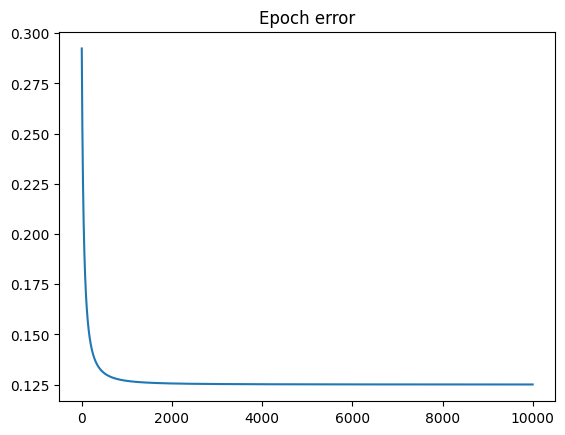

In [262]:
import matplotlib.pyplot as plt

plt.title("Epoch error");
plt.plot(range(epochs), E_epochs)

Ca a fitté?

Prouvez le moi!

In [263]:
for x, y in zip(X, Y):
    o = perceptron(W, x)
    print(x, y, o)

[False False] False 0.5
[False  True] True 0.9950340251727047
[ True  True] True 0.9999751055723708
[ True False] True 0.9950365300147597


# Nettoyez vous les mains y a des outils plus sympa !



## Introduction à pytorch

Pour ceux qui sont en avance
=> https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

## Supercharged numpy like data structure

In [264]:
import torch
import numpy as np
torch.cuda.is_available()

True

In [265]:
torch.__version__

'1.13.0+cu117'

In [266]:
a = np.random.randn(3,3)
a

array([[ 0.51850583, -0.13203909, -0.91284233],
       [-0.25247703,  0.78954435, -0.98083454],
       [-0.81859708, -0.64720471, -0.47613666]])

In [267]:
b = torch.Tensor(a)
b

tensor([[ 0.5185, -0.1320, -0.9128],
        [-0.2525,  0.7895, -0.9808],
        [-0.8186, -0.6472, -0.4761]])

In [268]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [269]:
c = b.to(device)
c

tensor([[ 0.5185, -0.1320, -0.9128],
        [-0.2525,  0.7895, -0.9808],
        [-0.8186, -0.6472, -0.4761]], device='cuda:0')

## Autograd

![](https://i.chzbgr.com/full/8983265024/h4F684A2F/differentiate-all-the-continuous-functions)

[tutoriel autograd](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)
et [ça aussi](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)

In [270]:
# requires_grad
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [271]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [272]:
out = y.mean()
out

tensor(3., grad_fn=<MeanBackward0>)

In [273]:
out.backward()

In [274]:
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

# Coder un réseau de neurone avec pytorch

Les outils sont disponibles dans [**torch.nn**](https://pytorch.org/docs/stable/nn.html) 

Pour définir un réseau il suffit d'hériter de la classe **torch.nn.Module** et de définir la méthode **forward** qui va transformer vos inputs en outputs.

La méthode **backward** qui permet de rétropropager les gradients est calculée automatiquement par **autograd** !


## Loss function
Pour entrainer un réseau il faut définir une loss fonction (nos moindres carrés du perceptron). Il existe pleins de fonctions de perte qui sont à choisir en fonction de vos problèmes.

Les loss disponibles de base sont [ici](https://pytorch.org/docs/stable/nn.html#loss-functions)

## Backprop et optimizers

On a maintenant tout pour faire apprendre notre réseau, il n'y a plus qu'à appliquer la backpropagation!

Et pytorch nous aide car il y a eu des évolutions depuis la définition de la descente de gradient. Il définit toute une liste d'**optimizer**.

https://pytorch.org/docs/stable/optim.html

## Recodez le perceptron AND avec pytorch

Refaites le 1er exercice en pytorch 

On défini tout d'abord notre modèle

In [275]:
import torch.nn as nn

# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        nbInFeature = 2
        nbOutFeature = 1
        self.W = nn.Linear(nbInFeature, nbOutFeature, True)

    def forward(self, x):
        return torch.sigmoid(self.W(x))

On peut alors instancier notre modele

In [276]:
model = Model()

In [277]:
model(torch.Tensor((0, 0)))

tensor([0.3404], grad_fn=<SigmoidBackward0>)

Choix d'une fonction de loss

In [278]:
loss = nn.MSELoss()

Choix d'un optimizer

In [279]:
list(model.parameters()) # W + bias

[Parameter containing:
 tensor([[0.6307, 0.2520]], requires_grad=True),
 Parameter containing:
 tensor([-0.6616], requires_grad=True)]

In [280]:
# fait évoluer W et bias
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Convertissons le dataset pour qu'il soit "pytorch friendly"

In [281]:
X = np.array([(False, False), (False, True), (True, True), (True, False)])
Y = np.array([False, True, True, True])

X_torch = [torch.Tensor(x) for x in X]
Y_torch = [torch.Tensor([y]) for y in Y]

/tmp/ipykernel_11403/841068050.py:5: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  Y_torch = [torch.Tensor([y]) for y in Y]


Créons une epoch

In [287]:
alpha = 0.1
epochs = 10000
E_epochs = []

for epoch in range(epochs):
  epochLoss = 0
  for x, y in zip(X_torch, Y_torch):
    # stop le gradient
    optimizer.zero_grad()

    # forward-pass
    yPred = model(x)

    # compute loss
    lossVal = loss(yPred, y)

    # calcule gradient
    lossVal.backward()

    epochLoss += float(lossVal)

    # application du calcule
    optimizer.step()
  E = 0.5 * epochLoss
  E_epochs.append(E)

Il suffit maintenant de faire plusieurs epoch

In [283]:
# done

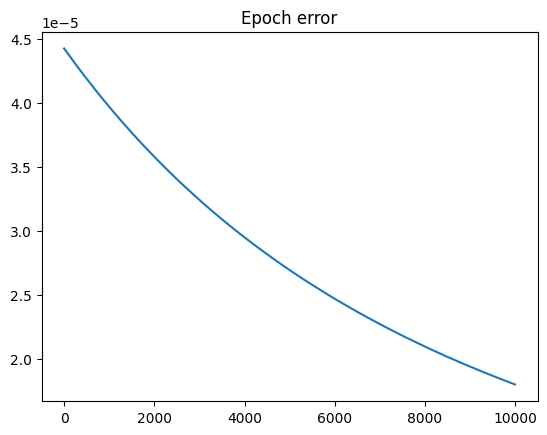

In [288]:
import matplotlib.pyplot as plt

plt.title("Epoch error");
plt.plot(range(epochs), E_epochs)

Ca a fitté?

Prouvez le moi!

In [289]:
for input, target in zip(X_torch, Y_torch):
  with torch.no_grad():
    output = model(input)
    print(input, output, target)

tensor([0., 0.]) tensor([0.0726]) tensor([0.])
tensor([0., 1.]) tensor([0.9549]) tensor([1.])
tensor([1., 1.]) tensor([0.9998]) tensor([1.])
tensor([1., 0.]) tensor([0.9549]) tensor([1.])
